** Skeleton of Assignment 4:**
    test if the distribution of 
    
    1) trip duration of bikers that ride during the day vs night
    
    2) age of bikers for trips originating in Manhattan and in Brooklyn
    
    are different. Use 3 tests: KS, Pearson's, Spearman's. 
    
    Use the scipy.stats functions scipy.stats.ks_2samp, scipy.stats.pearsonr, scipy.stats.spearmanr. 
    
    For the KS do the test with the entire dataset and with a subset 200 times smaller
    
    Choose a single significant threshold for the whole exercise. 
    
    For each test phrase the Null Hypothesis in words.
    
    Describe the return of the scipy function you use in each case.
    
    State the result in terms of rejection of the Null.

In [105]:
# my usual imports and setups
from __future__ import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
#imports downloader
from getCitiBikeCSV import getCitiBikeCSV # must have this function locally or in path
from get_jsonparsed_data import get_jsonparsed_data # must have this function locally or in path
%pylab inline

import scipy.stats
import os
#this makes my plots pretty! but it is totally not mandatory to do it
import json

#set this to true while deeloping to subsample data
DEVELOPING = True

#chose day hours vs night hours:
DAYTIME = (6, 18)

Populating the interactive namespace from numpy and matplotlib


** Statistical significance threshold throughout: $\alpha = 0.05$ **

In [106]:
alpha = 0.05

# Read in data
I am reading in data from January and June 2015 with the function that I created getCitiBikeCSV. You are requested to use 2 months at least. It would be a good idea to use data from a colder and a warmer months, since there are more riders in the warm weather and ridership patterns may change with weather, temperature, etc. You should use data from multiple months, joining multiple datasets (thus addressing some systematic errors as well)

In [107]:
# download data: a dataset from January 
datestring01 = '201501'
getCitiBikeCSV(datestring01)
datestring06 = '201506'
getCitiBikeCSV(datestring06)

file in place, you can continue
file in place, you can continue


In [108]:
# read in data Jan
cb201501 = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring01 + '-citibike-tripdata.csv')
cb201501.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1


In [109]:
#read in data Jun
cb201506 = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring06 + '-citibike-tripdata.csv')
cb201506.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1338,6/1/2015 0:00,6/1/2015 0:22,128,MacDougal St & Prince St,40.727103,-74.002971,2021,W 45 St & 8 Ave,40.759291,-73.988597,20721,Subscriber,1984.0,1
1,290,6/1/2015 0:00,6/1/2015 0:05,438,St Marks Pl & 1 Ave,40.727791,-73.985649,312,Allen St & E Houston St,40.722055,-73.989111,21606,Subscriber,1997.0,1
2,634,6/1/2015 0:01,6/1/2015 0:11,383,Greenwich Ave & Charles St,40.735238,-74.000271,388,W 26 St & 10 Ave,40.749718,-74.002950,16595,Subscriber,1993.0,1
3,159,6/1/2015 0:01,6/1/2015 0:04,361,Allen St & Hester St,40.716059,-73.991908,531,Forsyth St & Broome St,40.718939,-73.992663,16949,Subscriber,1981.0,1
4,1233,6/1/2015 0:02,6/1/2015 0:22,382,University Pl & E 14 St,40.734927,-73.992005,532,S 5 Pl & S 4 St,40.710451,-73.960876,17028,Customer,NaN,0


In [110]:
#subsample data while developing code 
#THIS IS IMPORTANT! the computing speed when using the full sample is orohibitively slow
#for a good workflow it was necessary to develope on a subsample, then run the whole notebook on the full dataset

if DEVELOPING:
    cb2015 = cb201501[::1000]
else:
    cb2015 = pd.concat([cb201501, cb201506])

In [111]:
print ("Shape of CB DF")
cb2015.shape

Shape of CB DF


(286, 15)

In [112]:
cb2015['date'] = pd.to_datetime(cb2015.starttime)
# note that with dataframes I can refer to variables as dictionary keys, 
# i.e. df['starttime'] or as attributes: df.starttime. 
cb2015.describe()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/numpy/lib/function_base.py:3403: RuntimeWarning: Invalid value encountered in median
  RuntimeWarning)


,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender
count,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,279.000000,286.000000
mean,687.192308,396.255245,40.735765,-73.991192,470.164336,40.735398,-73.990315,18153.412587,1974.243728,1.178322
std,449.668355,178.801982,0.019411,0.011451,394.580440,0.019790,0.012222,2054.032176,11.321563,0.442900
min,64.000000,72.000000,40.680983,-74.016584,116.000000,40.683178,-74.016584,14529.000000,1941.000000,0.000000
25%,375.250000,309.250000,40.722293,-73.999496,311.000000,40.722204,-73.999254,16383.000000,NaN,1.000000
50%,573.500000,402.500000,40.739071,-73.990848,430.000000,40.739225,-73.990093,18070.000000,NaN,1.000000
75%,895.750000,489.750000,40.751551,-73.983362,497.000000,40.750450,-73.981656,19909.000000,NaN,1.000000
max,2968.000000,2022.000000,40.769155,-73.950048,3002.000000,40.770513,-73.953809,21670.000000,1995.000000,2.000000


In [113]:
cb2015.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender', 'date'],
      dtype='object')

## SPLIT BY CATEGORY

splitting data by day vs night and looking at trip duration:

**H0: there is no statistical difference in the trip duration distribution during the day and the night**
$$ \alpha = 0.05 $$

extracting the age happens in the cell below

In [114]:
cb2015.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2,2015-01-01 00:01:00
1000,581,1/1/2015 10:46,1/1/2015 10:56,466,W 25 St & 6 Ave,40.743954,-73.991449,375,Mercer St & Bleecker St,40.726795,-73.996951,15552,Subscriber,1984.0,1,2015-01-01 10:46:00
2000,727,1/1/2015 13:39,1/1/2015 13:51,312,Allen St & E Houston St,40.722055,-73.989111,428,E 3 St & 1 Ave,40.724677,-73.987834,20781,Subscriber,1964.0,1,2015-01-01 13:39:00
3000,490,1/1/2015 15:48,1/1/2015 15:56,483,E 12 St & 3 Ave,40.732233,-73.988900,482,W 15 St & 7 Ave,40.739355,-73.999318,17606,Subscriber,1990.0,1,2015-01-01 15:48:00
4000,182,1/1/2015 17:51,1/1/2015 17:54,297,E 15 St & 3 Ave,40.734232,-73.986923,2003,1 Ave & E 18 St,40.734161,-73.980243,18978,Subscriber,1967.0,1,2015-01-01 17:51:00


In [115]:
cb2015['starttime'][0].split()[1].split(':')[0]

'0'

In [116]:
#extract hour when trip started
cb2015['starthour'] = pd.to_numeric(cb2015.starttime.apply(lambda x: 
                                                           x.split()[1].split(':')[0]))

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [117]:
#check start hour
cb2015.starthour.values[0]

0

In [118]:
# split day and night smaples
# chose trip starting between 6 and 18 as day trips
cb2015['dayride'] = (cb2015.starthour.values > DAYTIME[0]) & (cb2015.starthour.values < DAYTIME[1])

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [119]:
#collecting latitude and longitude for later splitting borroughs
latlon = (cb2015[['start station latitude', 
                'start station longitude']].values.astype(float))
print("The number of rows in the 2015 citibike dataset is", len(latlon))
#dropping not needed columns to lighten memory load
cb2015 = cb2015.drop(cb2015.columns[5:-1], axis=1).drop(cb2015.columns[1:3], axis=1)
cb2015.head()

The number of rows in the 2015 citibike dataset is 286


,tripduration,start station id,start station name,dayride
0,1346,455,1 Ave & E 44 St,False
1000,581,466,W 25 St & 6 Ave,True
2000,727,312,Allen St & E Houston St,True
3000,490,483,E 12 St & 3 Ave,True
4000,182,297,E 15 St & 3 Ave,True


In [120]:
type(latlon)

numpy.ndarray

In [121]:
#your df should look something like this
# look at these data carefully... you may see someinteresting values!
cb2015.describe()

,tripduration,start station id
count,286.000000,286.000000
mean,687.192308,396.255245
std,449.668355,178.801982
min,64.000000,72.000000
25%,375.250000,309.250000
50%,573.500000,402.500000
75%,895.750000,489.750000
max,2968.000000,2022.000000


# exploratory analysis

In [122]:
cb2015[~cb2015.dayride].head()

,tripduration,start station id,start station name,dayride
0,1346,455,1 Ave & E 44 St,False
5000,477,383,Greenwich Ave & Charles St,False
15000,246,401,Allen St & Rivington St,False
16000,833,410,Suffolk St & Stanton St,False
17000,1393,377,6 Ave & Canal St,False


In [123]:
(cb2015.dayride).count()

286

In [124]:
len(cb2015)

286

In [125]:
print ("Number of daytime rides", cb2015.dayride.sum())
print ("Number of nighttime rides", (~cb2015.dayride).sum())

Number of daytime rides 198
Number of nighttime rides 88


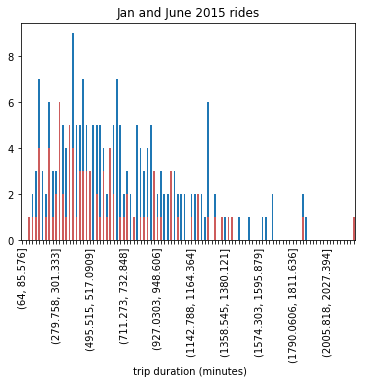

In [126]:
# plot daytime trip duration histogram in 100 bins
# plot 0% to 95% percentile because I expect these distribution to be long tailed and I see 43,000 hour trips above
pc = np.percentile(cb2015.tripduration, [0, 99])
bins = np.linspace(int(pc[0]), int(pc[1] / 100) * 100, 100)

#bins = np.arange(0,2000,60)
dayax = cb2015[cb2015.dayride].tripduration.groupby(
    pd.cut(cb2015[cb2015.dayride].tripduration, bins)).\
                    agg([count_nonzero]).plot(kind='bar', legend=False)
dayax.set_title("Jan and June 2015 rides")
# plot nighttime trip duration histogram
cb2015[~cb2015.dayride].tripduration.groupby(
    pd.cut(cb2015[~cb2015.dayride].tripduration, bins)).\
                    agg([count_nonzero]).plot(kind='bar', legend=False, ax=dayax, 
                                             color='IndianRed')
xlab = dayax.get_xticklabels()
dayax.set_xticklabels(['' if float(i)%10 > 0 else xlab[i] for i in range(len(xlab))]);
dayax.set_xlabel(" trip duration (minutes)");

In [127]:
print ("Figure 1: histogrammed distribution of ride duration by day (blue) and night (red).\n" +
       "The distributions are plotted up to the 95th percentile (removing outliers in the tail).\n" +
       "The distributions look similar, such that visual inspection is not sufficient " +
       "to determine if there is a difference." + 
       "The number of rides is obviously higher during day hours.\n" +
       "Note, that our definition of day includes %d hours between hour %d and %d"%(DAYTIME[1] - DAYTIME[0],
                                                                                    DAYTIME[0], DAYTIME[1]))

Figure 1: histogrammed distribution of ride duration by day (blue) and night (red).
The distributions are plotted up to the 95th percentile (removing outliers in the tail).
The distributions look similar, such that visual inspection is not sufficient to determine if there is a difference.The number of rides is obviously higher during day hours.
Note, that our definition of day includes 12 hours between hour 6 and 18


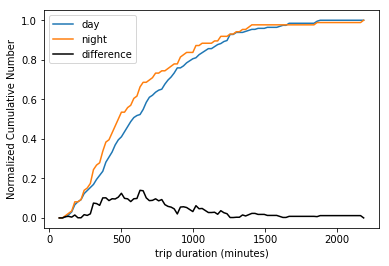

In [128]:
#print df.ageS, df.ageS.cumsum()

csD = cb2015[cb2015.dayride].tripduration.groupby(pd.cut(cb2015[cb2015.dayride].tripduration, 
                                                 bins)).agg([count_nonzero]).cumsum()

csN = cb2015[~cb2015.dayride].tripduration.groupby(pd.cut(cb2015[~cb2015.dayride].tripduration, 
                                                  bins)).agg([count_nonzero]).cumsum()

#print (np.abs(csD / csD.max()-csN / csN.max()))

pl.plot(bins[:-1] + 5, csD / csD.max(), label = "day")
pl.plot(bins[:-1] + 5, csN / csN.max(), label = "night")
pl.plot(bins[:-1] + 5, np.abs(csN / csN.max() - csD / csD.max()), 'k-',
        label = "difference")
pl.xlabel("trip duration (minutes)")
pl.ylabel("Normalized Cumulative Number")
pl.legend();

** Figure 2: the cumulative distribution of CitiBike riders' ages by day vs night trips.** 

The cumulative distribution is, by eye, practically identical with the maximum difference in heights between the cumulative distributions reached near 100 minutes of travel time. The difference is much less than 10%.

# KS tests to compare 2 samples

http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.ks_2samp.html

Null: the two distribution come from the same parent distribution

In [129]:
ks = scipy.stats.ks_2samp(cb2015[cb2015.dayride].tripduration, cb2015[~cb2015.dayride].tripduration)
print (ks)
if ks[1] >= alpha: 
    print ("The Null hypothesis that the two samples are generated " + 
            "by the same parent distribution cannot be rejected (p>=0.05)")
else: 
    print ("The Null hypothesis that the two samples are generated " + 
            "by the same parent distribution is rejected (p<0.05)")
    

Ks_2sampResult(statistic=0.15656565656565646, pvalue=0.090968346401024053)
The Null hypothesis that the two samples are generated by the same parent distribution cannot be rejected (p>=0.05)


** Note on the KS test: the KS test, and generally any test of Null Hypothesis Statistical Testing, has higher power for larger samples. With a million observations, 100s of thousands in each sample tiny differences tend to become statistically significant. ** (The distribution looked different by eye in a cumulative plot in the testig phase, with 1000 fewer samples but the p-value was less significant)

** Now retest using a test for correlation. **

The null hypothesis is that the two samples are generated from the same distribution. 

The alternative hypothesis is that the two samples are generated by unrelated distributions.

Note that this is not a rigorous test, unlike the KS test, and according to scipy.stats.pearsonr _"The p-values are not entirely reliable but are probably reasonable for datasets larger than 500 or so."_


In [130]:
#more rides during the day than during the night: subsample day rides
dfday = cb2015[cb2015.dayride].iloc[np.random.choice(range(len(cb2015[cb2015.dayride])), (~cb2015.dayride).sum(), 
                                      replace=False)]

In [131]:
parsons = scipy.stats.pearsonr(np.sort(dfday.tripduration), np.sort(cb2015[~cb2015.dayride].tripduration))
print ("Parson's test result", parsons)
if parsons[1] >= alpha: 
    print (r"The Null hypothesis that the two samples are generated from uncorrelated distributions. " + 
           "cannot be rejected (p>=0.05)")
else: 
    print ("The Null hypothesis that the two samples are generated from uncorrelated distributions. " + 
           "is rejected (p = %.3f<0.05)"%parsons[1])
 

Parson's test result (0.96742199151771135, 4.373442151506736e-53)
The Null hypothesis that the two samples are generated from uncorrelated distributions. is rejected (p = 0.000<0.05)


# Spearman's  test for correlation

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html#scipy.stats.spearmanr

In [132]:
spearmanr = scipy.stats.spearmanr(np.sort(dfday.tripduration), np.sort(cb2015[~cb2015.dayride].tripduration))
print ("Spearman's r test result", spearmanr)
if spearmanr[1] >= alpha: 
    print ("The Null hypothesis that the two samples are generated from uncorrelated distributions. " + 
           "cannot be rejected (p>=0.05)")
else: 
    print ("The Null hypothesis that the two samples are generated from uncorrelated distributions. " + 
           "is rejected (p = %.3f<0.05)"%spearmanr[1])
 

Spearman's r test result SpearmanrResult(correlation=0.99996037355507161, pvalue=3.8969496886886909e-178)
The Null hypothesis that the two samples are generated from uncorrelated distributions. is rejected (p = 0.000<0.05)


** This test is often used to assess if sample are generated by the same distribution but in fact it tests if the samples are generated by _correlated_ distributions. As a test to assess independence it is not powerful, as even a small amount of correlation would raise the p-value**

## BK vs Manhattan
reverse geocoding will give me the coordinates of each station will give me its location:
**NOTE: I do not need to run the query for every ride, but only for every station! **

In [139]:
nstations = pd.DataFrame(latlon).drop_duplicates().shape[0]
print ("number of stations: ", nstations)

number of stations:  175


In [146]:
latlon[:,0]

array([ 40.75001986,  40.74395411,  40.722055  ,  40.73223272,
        40.734232  ,  40.735238  ,  40.75206231,  40.76227205,
        40.7361967 ,  40.74147286,  40.707873  ,  40.76009437,
        40.69383   ,  40.75172632,  40.72710258,  40.72019576,
        40.72066442,  40.72243797,  40.756014  ,  40.74971775,
        40.75320159,  40.74317449,  40.73535398,  40.69474881,
        40.72621788,  40.72467721,  40.717571  ,  40.71542197,
        40.73224119,  40.74096374,  40.73223272,  40.7454973 ,
        40.75206231,  40.736502  ,  40.76727216,  40.72362738,
        40.7462009 ,  40.7172274 ,  40.7172274 ,  40.76344058,
        40.71739973,  40.74173969,  40.71273266,  40.746647  ,
        40.74173969,  40.72521311,  40.7403432 ,  40.76669671,
        40.751581  ,  40.70706456,  40.75172632,  40.7153379 ,
        40.73224119,  40.71219906,  40.74691959,  40.70905623,
        40.736502  ,  40.7423543 ,  40.71870987,  40.75097711,
        40.7149787 ,  40.73781509,  40.7153379 ,  40.74

In [147]:
#this cells reverse geocodes coordinates to zip codes
county = np.array([''] * len(cb2015))
#my API is saved as an environmental variable
#gAPI = os.getenv('GOOGLEAPI')
#my API saved in a local file as gAPI = 'XXXXXXXXXXXXXXXXXXXXXXXXXXX'
from gAPI import gAPI
for i,ll in enumerate(pd.DataFrame(latlon).drop_duplicates().values):
    print ("%d/%d"%(i, nstations))
    url = ("https://maps.googleapis.com/maps/api/geocode/json?latlng=" +
           "%f,%f&key=%s"%(
            ll[0], ll[1], gAPI))
    #print ("https://maps.googleapis.com/maps/api/geocode/json?latlng=" +
    #       "%f,%f&key=%s"%(
    #        ll[0], ll[1], os.getenv('GOOGLEAPI')))
    #print (get_jsonparsed_data(url)["results"][0]['address_components'][4])
    # for testing break loop after N
    #if i>10: break
    revgeo = get_jsonparsed_data(url)["results"][0]['address_components'][4]
    #print (revgeo)
    county[(latlon[:,0] == ll[0]) * 
           (latlon[:,1] == ll[1])] = revgeo['long_name']
cb2015['county'] = county
cb2015.head()

ImportError: No module named 'gAPI'

In [28]:
cb2015['county'] = county


In [29]:
cb2015.county.head()

0    N
1    N
2    N
3    K
4    N
Name: county, dtype: object

In [ ]:
cb2015['BK'] = (cb2015[cb2015['county'].values == "K"])

In [30]:
cb2015['BK'] = (cb2015.county.values == "K")
cb2015['M'] = (cb2015.county.values == "N")

In [31]:
print ("Number of brooklyn rides", cb2015.BK.sum())
print ("Number of Manhattan rides", cb2015.M.sum())
print ("ratio of rides BK to Manhattan:", cb2015.BK.sum() * 1.0 / cb2015.M.sum())

Number of daytime rides 66267
Number of nighttime rides 1153432
ratio of rides BK to Manhattan: 0.0574520214456


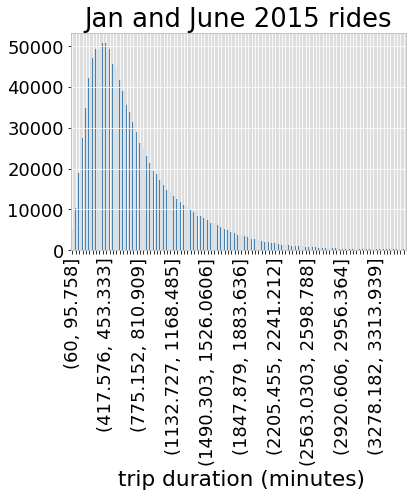

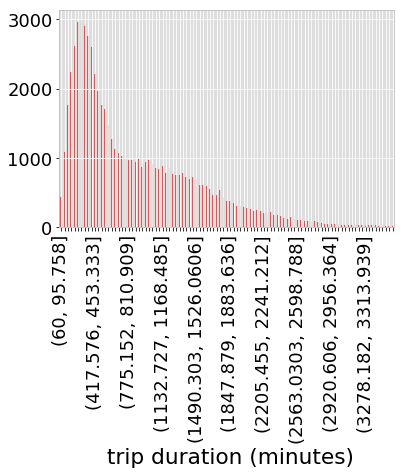

In [32]:
axM = cb2015[cb2015.M].tripduration.groupby(
    pd.cut(cb2015[cb2015.M].tripduration, bins)).\
                    agg([count_nonzero]).plot(kind='bar', legend=False)
axM.set_title("Jan and June 2015 rides")

# plot nighttime trip duration histogram
axBK = cb2015[cb2015.BK].tripduration.groupby(
    pd.cut(cb2015[cb2015.BK].tripduration, bins)).\
                    agg([count_nonzero]).plot(kind='bar', legend=False,#, ax=dayax, 
                                             color='IndianRed')
xlab = dayax.get_xticklabels()
axBK.set_xticklabels(['' if float(i)%10 > 0 else xlab[i] for i in range(len(xlab))]);
axM.set_xticklabels(['' if float(i)%10 > 0 else xlab[i] for i in range(len(xlab))]);

axM.set_xlabel(" trip duration (minutes)");
axBK.set_xlabel(" trip duration (minutes)");


** Figure 3: when splitting the sample by origin between Manhattan and Brooklyn the distribution of durations appear visibly different, with the BK distribution showing a flatter decline, and perhaps a second peak at ~1,000 minutes **. Also it should be note that now the number of rides is far more unbalanced between the two samples, with only about 5% of the rides originating from BK. 

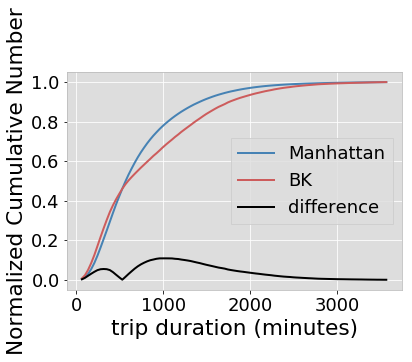

In [33]:
#print df.ageS, df.ageS.cumsum()

csM = cb2015[cb2015.M].tripduration.groupby(pd.cut(cb2015[cb2015.M].tripduration, 
                                                 bins)).agg([count_nonzero]).cumsum()

csBK = cb2015[cb2015.BK].tripduration.groupby(pd.cut(cb2015[cb2015.BK].tripduration, 
                                                  bins)).agg([count_nonzero]).cumsum()

#print (np.abs(csD / csD.max()-csN / csN.max()))

pl.plot(bins[:-1] + 5, csM / csM.max(), label = "Manhattan")
pl.plot(bins[:-1] + 5, csBK / csBK.max(), label = "BK")
pl.plot(bins[:-1] + 5, np.abs(csBK / csBK.max() - csM / csM.max()), 'k-',
        label = "difference")
pl.xlabel("trip duration (minutes)")
pl.ylabel("Normalized Cumulative Number")
pl.legend();

** Figure 4: the difference between the distribution of trip duration for trips originating in Manhattan (blue) vs Brooklyn (red) in cumulative space is indicated by the black line. The distance appears bimodal, indicating an obvious difference in the shape of the distribution, and it peaks near 1,000 minutes at over 10% **

In [34]:
ks = scipy.stats.ks_2samp(cb2015[cb2015.BK].tripduration, cb2015[cb2015.M].tripduration)
print (ks)
if ks[1] >= alpha: 
    print ("The Null hypothesis that the two samples are generated " + 
            "by the same parent distribution cannot be rejected (p>=0.05)")
else: 
    print ("The Null hypothesis that the two samples are generated " + 
            "by the same parent distribution is rejected (p<0.05)")
    

Ks_2sampResult(statistic=0.11289872747168939, pvalue=0.0)
The Null hypothesis that the two samples are generated by the same parent distribution is rejected (p<0.05)


In [35]:
manhattan = cb2015[cb2015.M].iloc[np.random.choice(range(len(cb2015[cb2015.M])), (cb2015.BK).sum(), 
                                      replace=False)]
parsons = scipy.stats.pearsonr(np.sort(manhattan.tripduration), np.sort(cb2015[cb2015.BK].tripduration))
print ("Parson's test result", parsons)
if parsons[1] >= alpha: 
    print (r"The Null hypothesis that the two samples are generated from uncorrelated distributions. " + 
           "cannot be rejected (p>=0.05)")
else: 
    print ("The Null hypothesis that the two samples are generated from uncorrelated distributions. " + 
           "is rejected (p = %.3f<0.05)"%parsons[1])
 

Parson's test result (0.96658313204480495, 0.0)
The Null hypothesis that the two samples are generated from uncorrelated distributions. is rejected (p = 0.000<0.05)


In [36]:
spearmanr = scipy.stats.spearmanr(np.sort(manhattan.tripduration), np.sort(cb2015[cb2015.BK].tripduration))
print ("Spearman's r test result", spearmanr)
if spearmanr[1] >= alpha: 
    print ("The Null hypothesis that the two samples are generated from uncorrelated distributions. " + 
           "cannot be rejected (p>=0.05)")
else: 
    print ("The Null hypothesis that the two samples are generated from uncorrelated distributions. " + 
           "is rejected (p = %.3f<0.05)"%spearmanr[1])
 

Spearman's r test result SpearmanrResult(correlation=0.99999931484281246, pvalue=0.0)
The Null hypothesis that the two samples are generated from uncorrelated distributions. is rejected (p = 0.000<0.05)


** The KS, Pearson's and Spearman's test conclude that the populations that generate the samples of rides from BK and Manhattan under consideration are different. Here we have a visual confirmation of this statistical difference, while earlier the statistical tests were reporting a result not obvious by visual inspection **

## Note: alternative solution to split the sample

this homework is not focusing on geospatial data, but on statistical tests. While the reverse geocoding solution is easily implemented and if you were familiar with geopandas a single sjoint call can split the sample between Manhattan and Brooklyn, a purely geometric soultion would be acceptable, even with low accuracy, as long as the purity of the samples was discussed. 

Here is its implementation: 

    1 In 2015 there were no stations in NJ or Queens, so those are not a concern.
    2 Look on google maps for the coordinates of a line that separates Manhattan from BK

x1 = (40.738102, -73.962194)

x0 = (40.694456, -74.012116)

to the East of this line you are in BK, to the West in Manhattan. 
   - if _lat_ > x1 : Manhattan
   - if _lat_ < x0 : BK
   - if _lat_ > x0 and _lat_ < x1 and _lon_ < _ylong(lat)_ : BK

    _ylong(lat)_ = a * _lat_ + b =>

    Using x1: 
                -73.962194 = a * 40.738102 + b 
                => b = - 73.962194 - a * 40.738102 

    Using x0: 
                -74.012116 = a * 40.694456 + b =
                => -74.012116 = a * 40.694456 - a * 40.738102 - 73.962194 = 
                => -74.012116 = a * (40.694456 - 40.738102) - 73.962194 
                => a = (-74.012116 + 73.962194) / (40.694456 - 40.738102) = 1.143793
                => b = - 73.962194 - 1.143793 * 40.738102  = -120.558150
            => the equation of the line that split Manhattan from BK is 
            ylong(lat) = 1.143793 * lat - 120.558150
   **if _lat_ > x0 and _lat_ < x1 and _long_ < _ylong(lat)_ : BK**

In [57]:
#defines a function that to place statin in BL or M based on 2 points

x1 = (40.738102, -73.962194)
x0 = (40.694456, -74.012116)

def manORbk(coords):
    ''' defined points in BK or Manhattan based on position w respect to a single boundary line
    Arguments:
    coords: (lat, lon) tuple or 1D array of size 2, coordinates in degrees
    returns: character "M" or "B" for Manhattan and Brooklyn respectively
    '''
    lat,lon = coords
    #print (lat, lon)
    if lat >= x1[0] :
        #print (1)
        return 'M'
    elif lat <= x0[0] :
        #print (2)
        return 'B'
    elif lon > 1.143793 * lat -120.558150:
        #print (3, 1.143793 * lat -120.558150)
        return 'B'
    else: 
        #print (4, 1.143793 * lat -120.558150, lon > 1.143793 * lat -120.558150)
        return 'M'

In [92]:
#test function
manORbk((40.68807003, -73.98410637))

'B'

In [70]:
#this cells passes coordinates to manORbk
cb2015['latlon'] = [(lat,lon) for lat, lon in latlon]
cb2015['MorBK'] = cb2015['latlon'].apply(manORbk)


In [94]:
statsionsDF = cb2015.drop_duplicates(subset=["latlon",
                                             "MorBK",
                                             "BK", "M"])


In [153]:
#assess contamination: 
#count the instances of station in manhattan for either location column 'M' and MorBK
#and remove those that have Manhattan  for both classifications
misclassified = np.array([((statsionsDF.iloc[i]['MorBK'] == 'M') or \
                 (statsionsDF.iloc[i].M)) \
                and not ((statsionsDF.iloc[i]['MorBK'] == 'M') and \
                         (statsionsDF.iloc[i].M)) 
                for i in range(len(statsionsDF))])

print ("number of miscategorized stations:", 
       statsionsDF[misclassified].shape[0])


number of miscategorized stations: 30


In [174]:
misclassified2 = np.array([((statsionsDF.iloc[i]['MorBK'] == 'B') or \
                 (statsionsDF.iloc[i].BK)) \
                and not ((statsionsDF.iloc[i]['MorBK'] == 'B') and \
                         (statsionsDF.iloc[i].BK)) 
                for i in range(len(statsionsDF))])

print ("also number of miscategorized stations:", 
       statsionsDF[misclassified2].shape[0])


also number of miscategorized stations: 32


In [180]:
print ("total fraction of misclassified trips: %.2f"%(1.0 * 
       cb2015.merge(statsionsDF[misclassified + misclassified2], 
                          on='start station id', 
                          how="inner").shape[0] / cb2015.shape[0]))
print ("we do not expect this level of contamination to affect the ",
       "statistical result")

total fraction of misclassified trips: 0.04
we do not expect this level of contamination to affect the  statistical result


In [155]:
#visualizing misclassified stations is fun, 
#but would absolutely not be necessary
#could be done with gmaps, but it is easier with geopandas
import geopandas as gpd


#download unzip shape file
!wget https://data.cityofnewyork.us/download/i8iw-xf4u/application%2Fzip
!unzip application%2Fzip

--2017-10-16 23:07:40--  https://data.cityofnewyork.us/download/i8iw-xf4u/application%2Fzip
Resolving data.cityofnewyork.us... 52.206.140.205
Connecting to data.cityofnewyork.us|52.206.140.205|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://data.cityofnewyork.us/api/views/i8iw-xf4u/files/YObIR0MbpUVA0EpQzZSq5x55FzKGM2ejSeahdvjqR20?filename=ZIP_CODE_040114.zip [following]
--2017-10-16 23:07:41--  https://data.cityofnewyork.us/api/views/i8iw-xf4u/files/YObIR0MbpUVA0EpQzZSq5x55FzKGM2ejSeahdvjqR20?filename=ZIP_CODE_040114.zip
Connecting to data.cityofnewyork.us|52.206.140.205|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1514401 (1.4M) [application/octet-stream]
Saving to: “application%2Fzip.3”

100%[======================================>] 1,514,401   1.97M/s   in 0.7s    

2017-10-16 23:07:41 (1.97 MB/s) - “application%2Fzip.3” saved [1514401/1514401]

Archive:  application%2Fzip
replace ZIP_CODE_040114.shx? [y]es, [n]o, 

In [156]:
zips = gpd.GeoDataFrame.from_file("ZIP_CODE_040114.shp")
#converting units to lat-lon
zips = zips.to_crs(epsg=4326) # epsg=4326: lat/on | 26918: NAD83/UTM zone 18N | epsg=2263 is US feet

In [181]:
import shapely
from fiona.crs import from_epsg

# Create Point Geometry for based on lonlat column
statsionsDF['geometry'] = statsionsDF[['latlon']].\
                applymap(lambda x: shapely.geometry.Point(list((x[1], x[0]))))
statsionsDF = gpd.GeoDataFrame(statsionsDF)
statsionsDF.crs = from_epsg(4326) 

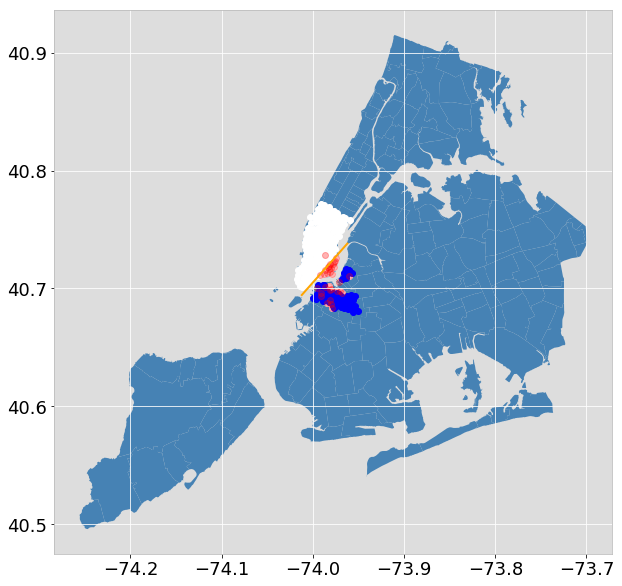

In [196]:
ax = pl.figure(figsize=(10,10)).add_subplot(111)
zips.plot(ax=ax)
allstations = gpd.GeoDataFrame(cb2015.drop_duplicates(subset=["latlon"]))
allstations['geometry'] = allstations[['latlon']].\
                applymap(lambda x: shapely.geometry.Point(list((x[1], x[0]))))
allstations[allstations.M].plot(color='w', ax=ax)
allstations[allstations.BK].plot(color='b', ax=ax)
                                                                                
statsionsDF[misclassified + misclassified2].plot(ax=ax, color='r', alpha=0.3);
pl.plot([x1[1], x0[1]], [x1[0], x0[0]], '-', color="orange");

** Figure 5: Map of NYC with the misclassified CitiBike stations overplotted in red. The stations identified as in Manhattan by the reverse geocoding loop are plotted in white, and those identified and brookly in blue. There are misclassifications due to our function classifying as BK the stations east of the yellow line, resulting in Mannattan station near City Hall classified as Brooklyn. However the remaining misclassified stations are misclassified by the reverse geocoding function classifiying them as Manhattan, while they are in fact in Brooklyn. ** The error induced by the simple geometric location is then lower than 4%, and there is some contamination (also less than 4%) in the reverse geocoded solution as well. These functions should be tested more thoroughtly but, as indicated, the contamination is small and we do not believe it affects the (very strong) statistical results.